# Importing necessary libraries

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro,f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [30]:
wq = pd.read_csv("C:/Users/kamalesh reddy/Downloads/winequality-red.csv")

In [31]:
wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data ingestion

In [32]:
wq["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

There are 6 qualities in wine

In [33]:
wq.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values are present in the given data

In [36]:
wq.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the attributes are numerical

In [38]:
wq.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Data analysis

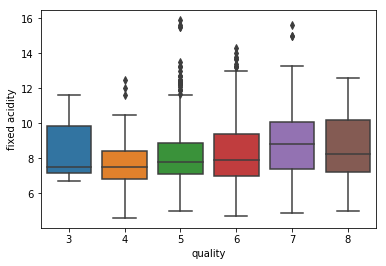

In [40]:
sns.boxplot(y = wq["fixed acidity"],x= wq["quality"])

 let us check are the means of fixed acidity of all quality wines are same or not statistically by using anova

H0:- Average fixed acidity of all quality wines are same

Ha:- Average fixed acidity of any of two quality wines are not same

In [43]:
g1 = wq[wq["quality"]==3]["fixed acidity"]
g2 = wq[wq["quality"]==4]["fixed acidity"]
g3 = wq[wq["quality"]==5]["fixed acidity"]
g4 = wq[wq["quality"]==6]["fixed acidity"]
g5 = wq[wq["quality"]==7]["fixed acidity"]
g6 = wq[wq["quality"]==8]["fixed acidity"]

In [44]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=6.283081158221344, pvalue=8.793966623816744e-06)

Since p value is less than 0.05 we reject null hypothesis stating that average fixed acidity of any of two groups are not equal

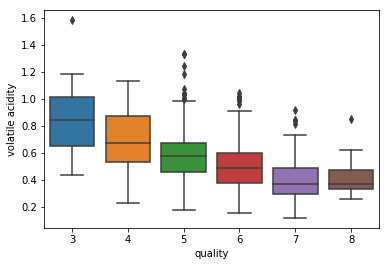

In [45]:
sns.boxplot(y = wq["volatile acidity"],x= wq["quality"])

we can clearly observe that average volatile acidity varies with quality of wine

And with increase in quality volatile acidity of wines keeps on decreasing

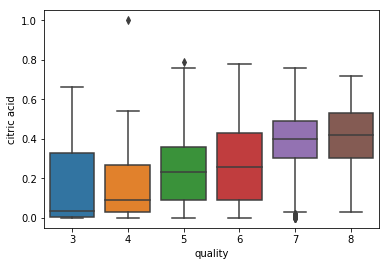

In [46]:
sns.boxplot(y = wq["citric acid"],x= wq["quality"])

citric acid differs with quality of wine

And with increase in quality of wine citric acid increases

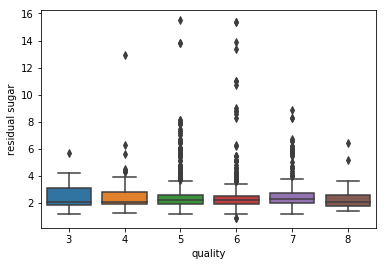

In [47]:
sns.boxplot(y = wq["residual sugar"],x= wq["quality"])

Average residual sugar seems to be close for all quality of wines

we can check using anova test whether mean of residual sugar for all quality wines are equal or not

H0:- Average residual sugar of all quality wines are same

Ha:- Average residual sugar of any of two quality wines are not same

In [50]:
g1 = wq[wq["quality"]==3]["residual sugar"]
g2 = wq[wq["quality"]==4]["residual sugar"]
g3 = wq[wq["quality"]==5]["residual sugar"]
g4 = wq[wq["quality"]==6]["residual sugar"]
g5 = wq[wq["quality"]==7]["residual sugar"]
g6 = wq[wq["quality"]==8]["residual sugar"]

In [51]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=1.0533735778522084, pvalue=0.3846187754292449)

since pvalue is 38% that is greater than 5% we failed to reject null hypothesis, resulting average residual sugar of all quality wines are same

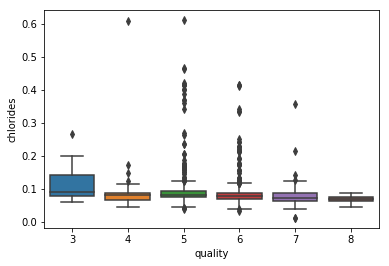

In [52]:
sns.boxplot(y = wq["chlorides"],x= wq["quality"])

Average value of chlorides are also closely packed and having close enough mean value for all quality wines, let us check by using anova test

H0:- Average chlorides of all quality wines are same

Ha:- Average chlorides of any of two quality wines are not same

In [59]:
g1 = wq[wq["quality"]==3]["chlorides"]
g2 = wq[wq["quality"]==4]["chlorides"]
g3 = wq[wq["quality"]==5]["chlorides"]
g4 = wq[wq["quality"]==6]["chlorides"]
g5 = wq[wq["quality"]==7]["chlorides"]
g6 = wq[wq["quality"]==8]["chlorides"]

In [60]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=6.035638592358693, pvalue=1.526539024860758e-05)

since p value is less than 5% we reject null hypothesis,saying that average value of chlorides differ with quality of wine

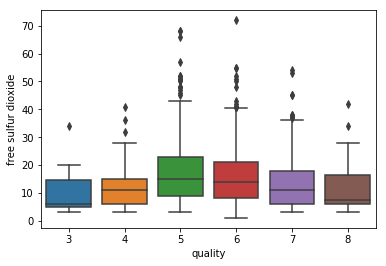

In [62]:
sns.boxplot(y = wq["free sulfur dioxide"],x= wq["quality"])

H0:- Average free sulfur dioxide of all quality wines are same

Ha:- Average free sulfur dioxide of any of two quality wines are not same

In [64]:
g1 = wq[wq["quality"]==3]["free sulfur dioxide"]
g2 = wq[wq["quality"]==4]["free sulfur dioxide"]
g3 = wq[wq["quality"]==5]["free sulfur dioxide"]
g4 = wq[wq["quality"]==6]["free sulfur dioxide"]
g5 = wq[wq["quality"]==7]["free sulfur dioxide"]
g6 = wq[wq["quality"]==8]["free sulfur dioxide"]

In [65]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=4.754233103987794, pvalue=0.00025708272340177853)

since p value is less than 5% we reject null hypothesis,saying that average value of free sulphur dioxide differ with quality of wine

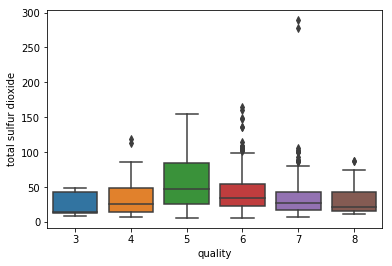

In [67]:
sns.boxplot(y = wq["total sulfur dioxide"],x= wq["quality"])

H0:- Average total sulfur dioxide of all quality wines are same

Ha:- Average total sulfur dioxide of any of two quality wines are not same

In [74]:
g1 = wq[wq["quality"]==3]["total sulfur dioxide"]
g2 = wq[wq["quality"]==4]["total sulfur dioxide"]
g3 = wq[wq["quality"]==5]["total sulfur dioxide"]
g4 = wq[wq["quality"]==6]["total sulfur dioxide"]
g5 = wq[wq["quality"]==7]["total sulfur dioxide"]
g6 = wq[wq["quality"]==8]["total sulfur dioxide"]

In [75]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=25.4785095182643, pvalue=8.533598445272067e-25)

since p value is less than 5% we reject null hypothesis,saying that average value of total sulphur dioxide differ with quality of wine

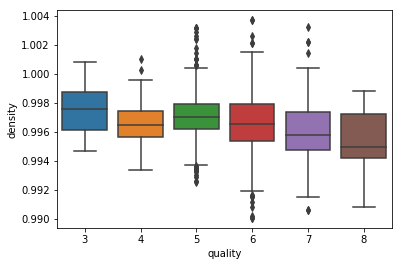

In [68]:
sns.boxplot(y = wq["density"],x= wq["quality"])

H0:- Average density of all quality wines are same

Ha:- Average density of any of two quality wines are not same

In [77]:
g1 = wq[wq["quality"]==3]["density"]
g2 = wq[wq["quality"]==4]["density"]
g3 = wq[wq["quality"]==5]["density"]
g4 = wq[wq["quality"]==6]["density"]
g5 = wq[wq["quality"]==7]["density"]
g6 = wq[wq["quality"]==8]["density"]

In [78]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=13.396356896972382, pvalue=8.124394737040528e-13)

since p value is less than 5% we reject null hypothesis,saying that average value of density differ with quality of wine

And there is a slight decrease in density with increase in quality

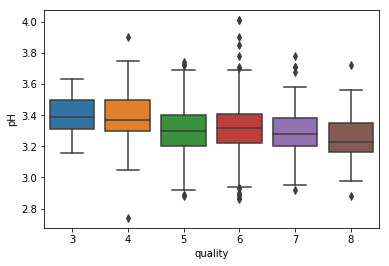

In [70]:
sns.boxplot(y = wq["pH"],x= wq["quality"])

H0:- Average pH of all quality wines are same

Ha:- Average pH of any of two quality wines are not same

In [80]:
g1 = wq[wq["quality"]==3]["pH"]
g2 = wq[wq["quality"]==4]["pH"]
g3 = wq[wq["quality"]==5]["pH"]
g4 = wq[wq["quality"]==6]["pH"]
g5 = wq[wq["quality"]==7]["pH"]
g6 = wq[wq["quality"]==8]["pH"]

In [81]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=4.341764303214791, pvalue=0.00062843887009581)

since p value is less than 5% we reject null hypothesis,saying that average value of pH differ with quality of wine

And there is a slight decrease in pH with increase in quality

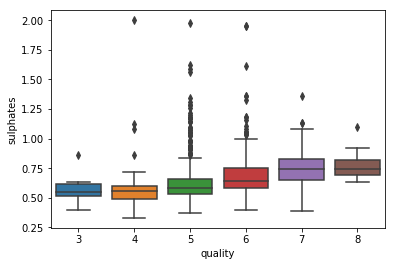

In [71]:
sns.boxplot(y = wq["sulphates"],x= wq["quality"])

H0:- Average sulphates of all quality wines are same

Ha:- Average sulphates of any of two quality wines are not same

In [83]:
g1 = wq[wq["quality"]==3]["sulphates"]
g2 = wq[wq["quality"]==4]["sulphates"]
g3 = wq[wq["quality"]==5]["sulphates"]
g4 = wq[wq["quality"]==6]["sulphates"]
g5 = wq[wq["quality"]==7]["sulphates"]
g6 = wq[wq["quality"]==8]["sulphates"]

In [84]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=22.273376089595672, pvalue=1.2258900918533501e-21)

since p value is less than 5% we reject null hypothesis,saying that average value of sulphates differ with quality of wine

And there is a slight increase in sulphates with increase in quality

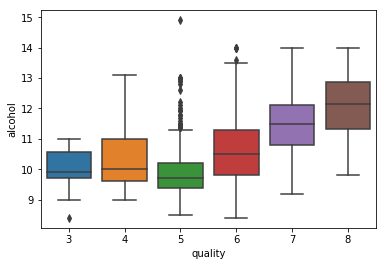

In [86]:
sns.boxplot(y = wq["alcohol"],x= wq["quality"])

we can observe that alcohol content og 3,4,5 quality wines are close to each other and for wine quality 6,7,8 alcohol level increases with increase in quality

And we are having low alcohol level in wine quality 5 and high in wine quality 8

# Feature engineering

Consider wine quality 3,4,5 as class 0 and wine quality 6,7,8 as class 1 and we can build our model using that quality column as target variable

In [88]:
wq["quality"] = wq["quality"].replace(to_replace = [3,4,5,6,7,8],value = [0,0,0,1,1,1] )

In [90]:
wq["quality"].value_counts()

1    855
0    744
Name: quality, dtype: int64

we can consider 3,4,5 as class 0 wine quality and 6,7,8 as class 1 wine quality

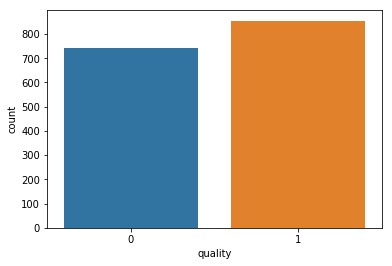

In [91]:
sns.countplot(wq["quality"])

There is no imbalance in our data

# Base Model

Logistic Regression

In [100]:
x = wq.drop("quality",axis=1)
y = wq["quality"]

In [101]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [102]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
#predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

Training accuracy

In [105]:
accuracy_score(y_train,y_pred_train)

0.7458952306489445

Testing accuracy

In [106]:
accuracy_score(y_test,y_pred_test)

0.75625

Both testing and training accuracy are close to each other and equal to 0.75

In [107]:
confusion_matrix(y_test,y_pred_test)

array([[107,  41],
       [ 37, 135]], dtype=int64)

Total 107+135 = 242 are correctly classified as their respective classes and 78 are wrongly classified

In [108]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       148
           1       0.77      0.78      0.78       172

    accuracy                           0.76       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320



We are having precision and recall as 0.78 so f1 score will also be 0.78

# Decison tree classifier

In [114]:
dt = DecisionTreeClassifier()

In [115]:
model1 = dt.fit(x_train,y_train)

In [116]:
print("Training accuracy is",accuracy_score(y_train,model1.predict(x_train)))
print("Testing accuracy is",accuracy_score(y_test,model1.predict(x_test)))

Training accuracy is 1.0
Testing accuracy is 0.771875


Decision tree predicts 100% correctly with the data it is learned

In [117]:
confusion_matrix(y_test,model1.predict(x_test))

array([[117,  31],
       [ 42, 130]], dtype=int64)

In [122]:
print(classification_report(y_test,model1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       148
           1       0.81      0.76      0.78       172

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



# K Nearest Neighbours

In [123]:
knn = KNeighborsClassifier()

In [124]:
model2 = knn.fit(x_train,y_train)

In [125]:
print("Training accuracy is",accuracy_score(y_train,model2.predict(x_train)))
print("Testing accuracy is",accuracy_score(y_test,model2.predict(x_test)))

Training accuracy is 0.7740422204847537
Testing accuracy is 0.60625


Knn is having low accuracy in predicting compared to other models

In [127]:
confusion_matrix(y_test,model2.predict(x_test))

array([[95, 53],
       [73, 99]], dtype=int64)

In [128]:
print(classification_report(y_test,model2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       148
           1       0.65      0.58      0.61       172

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



F1 score is 0.61 which is less compared to other models

# Naive bayes

In [129]:
nb = GaussianNB()

In [131]:
model3 = nb.fit(x_train,y_train)

In [132]:
print("Training accuracy is",accuracy_score(y_train,model3.predict(x_train)))
print("Testing accuracy is",accuracy_score(y_test,model3.predict(x_test)))

Training accuracy is 0.7279124315871774
Testing accuracy is 0.73125


In [133]:
confusion_matrix(y_test,model3.predict(x_test))

array([[106,  42],
       [ 44, 128]], dtype=int64)

In [135]:
print(classification_report(y_test,model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       148
           1       0.75      0.74      0.75       172

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



# Ensemble methods

# Random forest 

In [138]:
rf = RandomForestClassifier()

In [139]:
model4 = rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [140]:
print("Training accuracy is",accuracy_score(y_train,model4.predict(x_train)))
print("Testing accuracy is",accuracy_score(y_test,model4.predict(x_test)))

Training accuracy is 0.9867083659108679
Testing accuracy is 0.809375


Accuracy scores are high compared to other models

In [141]:
confusion_matrix(y_test,model4.predict(x_test))

array([[125,  23],
       [ 38, 134]], dtype=int64)

Models false negatives and false positives are decresed to 61

In [142]:
print(classification_report(y_test,model4.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       148
           1       0.85      0.78      0.81       172

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



we got random forest as high with 0.81 f1score and 80% accuracy 

# Gradient Boosting 

In [180]:
gb = GradientBoostingClassifier()

In [181]:
model5 = gb.fit(x_train,y_train)

In [182]:
print("Training accuracy is",accuracy_score(y_train,model5.predict(x_train)))
print("Testing accuracy is",accuracy_score(y_test,model5.predict(x_test)))

Training accuracy is 0.872556684910086
Testing accuracy is 0.759375


In [183]:
confusion_matrix(y_test,model5.predict(x_test))

array([[108,  40],
       [ 37, 135]], dtype=int64)

In [184]:
print(classification_report(y_test,model5.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       148
           1       0.77      0.78      0.78       172

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

